In [12]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Machine Learning module\\titanic_dataset.csv")

# Data set details.

-PassengerID: Unique ID for passenger.

-Survived: Discrete & categorical values (1 & 0), were 1 indicates survival & 0 indicated non-survival.

-Pclass: Represents the class in which a passenger is travelling (1st, 2nd or 3rd).

-Name: Names of the passengers on board.

-SEX: Gender of the passengers on board. This column also has categorical values.

-AGE: Age of passengers on board.

-SibSp: This column indicates the number of siblings or spouse of passenger's on onboard.

-Parch: This column indicates the number of parents or children onboard.

-Ticket: This column indicates the unique ticket number of passengers.

-Fare: This column indicates the amount of each passenger ticket.

-Embarked: This column indicates the starting / onboarding point of th passengers indicated by (S,C & Q - Southampton, Cherbourg & Queenstown respctively).

In [5]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#to know how many rows and columns are their in the dataset

df1.shape

(891, 12)

In [10]:
df=df1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# From the data, we can get some insights to see predictions from our data i.e EDA (Exploratory Data Analysis)

# People Survived

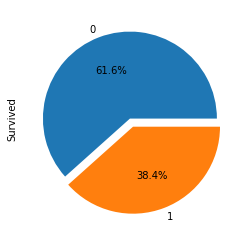

In [13]:
# Number of Survivors
df1['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%')
plt.show()

# Number of Survivors by Pclass i.e. class 1, class 2 & class 3# 

In [18]:
pd.crosstab([df1.Sex,df1.Survived],df1.Pclass).style.background_gradient()

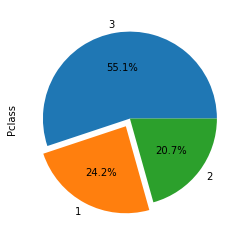

In [19]:
df1['Pclass'].value_counts().plot.pie(explode=[0,0.1,0], autopct='%1.1f%%')
plt.show()

# Number of Survivors by Embarked 

In [21]:
pd.crosstab([df1.Embarked,df1.Pclass],[df1.Sex,df1.Survived]).style.background_gradient()

# Correlation between variables

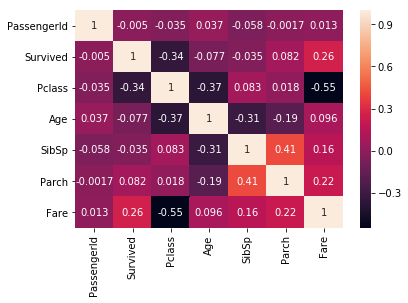

In [25]:
sns.heatmap(df1.corr(),annot=True)

#We can observe that the highest correlation is between SibSp and Parch i.e 0.41. We can also see that variables are not much correlated. Thus, we will continue with all variables.

# First, drop columns from the dataset that are obviously unnecessary for your model.
# Data wrangling

In [27]:
df1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [28]:
#treating null values

df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

    We can see that 'Age', 'Cabin' & 'Embarked' coloumn have null values, 177, 687, 2, respectively.
       1) Since there are 687 null values in the Cabin column, it is better to drop the Cabin column as it cannot be a 
       factor on which survival depends.
       2) As for the Age column, we can fill the 177 null values with the median value of the Age column.
       3) For the Embarked column, we will remove the missing values,by removing the rows, as the it is significantly low.

In [29]:
#dropping cabin column
df1.drop("Cabin", axis=1, inplace=True)

In [30]:
df1.head(10)   #cabin coloumn dropped...

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [31]:
#fill median values in Age coloumn for null values

mdn = df1["Age"].median()
df1["Age"] = df1["Age"].fillna(mdn)
print(mdn)

28.0


In [33]:
df1.head(10)
#index 5, with passengerid 6 has been assigned median value.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [35]:
array = ['S', 'C', 'Q']
df1.loc[~df1['Embarked'].isin(array)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [36]:
df1.dropna(inplace = True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [38]:
df1.isnull().sum()
#all null values have been settled.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [39]:
#converting male/female to categorical data i.e. 1 & 0.

gender=pd.get_dummies(df1["Sex"])
gender


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [40]:
gender=gender.drop("male",axis=1)
gender.head(5)


#since the values are in binary form thus one col is enough to know if the passenger is male or female.

,female
0,0
1,1
2,1
3,1
4,0


In [41]:
emb = pd.get_dummies(df1["Embarked"])
emb.head(5)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [42]:
#again we will drop one col since 2 cols are enough to know the boarding location for the passengers.

emb=emb.drop("C",axis=1)
emb.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [43]:
#converting pclass values in categorical data

pclass = pd.get_dummies(df1["Pclass"])
pclass.head(5)

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


Value 1 represnts valid & value 0 represents not-valid.

    1 - Pclass 1
    2 - Pclass 2
    3 - Pclass 3
We can now remove one column as we donot need all three of the columns. We will remove the C column. In this case value 1 will represent that the passenger is from that respective Pclass & value 0 will represent that the passenger is not from that respective Pclass.

In [44]:
#dropping col

pclass=pclass.drop(1,axis=1)
pclass.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


# concatenating all new cols in data frame to form a new data frame for further logistic regressions.

In [45]:
df1 = pd.concat([df1,gender,emb,pclass], axis=1)

In [46]:
df1.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,0,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,1,0,1,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,0,0,1,0


Dropping all the irrelevant columns. The columns - "PassengerId","Name","Ticket" have no major significance, so we can drop them. Since we have coverted the columns - "Pclass","Embarked","Sex" into categorical variables therfore we can drop these too.

In [47]:
df1=df1.drop(["PassengerId","Pclass","Name","Ticket","Embarked","Sex"],axis=1)

In [49]:
df1.head(10)

,Survived,Age,SibSp,Parch,Fare,female,Q,S,2,3
0,0,22.0,1,0,7.2500,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,1,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1
5,0,28.0,0,0,8.4583,0,1,0,0,1
6,0,54.0,0,0,51.8625,0,0,1,0,0
7,0,2.0,3,1,21.0750,0,0,1,0,1
8,1,27.0,0,2,11.1333,1,0,1,0,1
9,1,14.0,1,0,30.0708,1,0,0,1,0


# Splitting the data into train & test 

In [50]:
df1.shape

(889, 10)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Survived', axis=1), df1['Survived'],\
                                                    train_size=0.8, random_state=156)

# Fit Logistic Regression model.# 

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logit = LogisticRegression()


In [65]:
logit.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
#class predictions

predictions = logit.predict(X_test)

In [67]:
#accuracy rate

logit.score(X_test, y_test)

0.8033707865168539

In [69]:
#error rate

1-logit.score(X_test, y_test)

0.1966292134831461

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8033707865168539

In [72]:
#number of correctly classified values

accuracy_score(y_test, predictions, normalize=False)

143

In [73]:
#incorrectly classified

len(y_test) - accuracy_score(y_test, predictions, normalize=False)

35

#  Log loss

In [74]:
from sklearn.metrics import log_loss

In [77]:
y_test_encoded = y_test.map(lambda x: 1 if x == 'pos' else 0)

In [79]:
predictions_encoded = np.where(predictions=='pos',1,0)


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


In [83]:
log_loss(y_test_encoded, predictions_encoded)

TypeError: Singleton array array(0) cannot be considered a valid collection.

In [81]:
predictions[:5]

array([0, 0, 0, 0, 0], dtype=int64)

# calculate confusion matrix

In [84]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [85]:
confusion_mat = confusion_matrix(y_test, predictions)


In [86]:
confusion_mat = confusion_matrix(y_test_encoded, predictions_encoded)


TypeError: Singleton array array(0) cannot be considered a valid collection.